In [1763]:
# imports and such
import skimage
import scipy
from matplotlib import pyplot as plt
import numpy as np
from skimage.color import rgb2gray

In [ ]:
# function for building figures
def figure(lst, r, c):
    fig, axes = plt.subplots(r, c, figsize=(9, 2*r))    # make grid with size scale
    ax = axes.ravel()
    if r > 1:
        fig.subplots_adjust(hspace=0.01, wspace=0.01)   # compact figure if multiple row

    for i in range(r*c):
        ax[i].axis('off')
        ax[i].imshow(lst[i], cmap=plt.cm.gray)

    plt.show()

# Task 1

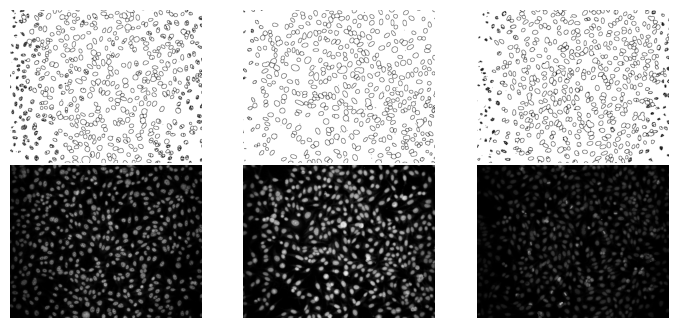

In [ ]:
# read image
gt_img_1 = skimage.io.imread('cells/9343 AM Edges.bmp')[:,:,0]
gt_img_2 = skimage.io.imread('cells/10905 JL Edges.bmp')[:,:,0]
gt_img_3 = skimage.io.imread('cells/43590 AM Edges.bmp')[:,:,0]
img_1_normal = skimage.io.imread('cells/9343 AM.bmp')
img_2_normal = skimage.io.imread('cells/10905 JL.bmp')
img_3_normal = skimage.io.imread('cells/43590 AM.bmp')
img_1 = rgb2gray(img_1_normal)
img_2 = rgb2gray(img_2_normal)
img_3 = rgb2gray(img_3_normal)

# show image
lst_normal = [gt_img_1, gt_img_2, gt_img_3, img_1_normal, img_2_normal, img_3_normal]
figure(lst_normal, 2, 3)

Define operators and magnitude function

In [ ]:
# define the operators found in week 3 slides
sobel_x = np.array(
    [[1,0,-1],
     [2,0,-2],
     [1,0,-1]])

sobel_y = np.array(
    [[1,2,1],
     [0,0,0],
     [-1,-2,-1]])

robinson_x = np.array(
    [[1,1,1],
     [1,-2,1],
     [-1,-1,-1]])

robinson_y = np.array(
    [[-1,1,1],
     [-1,-2,1],
     [-1,1,1]])

prewitt_x = np.array(
    [[1,1,1],
     [0,0,0],
     [-1,-1,-1]])

prewitt_y = np.array(
    [[-1,0,1],
     [-1,0,1],
     [-1,0,1]])

kirsch_x = np.array(
    [[3,3,3],
     [3,0,3],
     [-5,-5,-5]])

kirsch_y = np.array(
    [[-5,3,3],
     [-5,0,3],
     [-5,3,3]])

gaussian_x = np.array(
    [[-1,-2,0,2,1],
     [-4,-8,0,8,4],
     [-6,-12,0,12,6],
     [-4,-8,0,8,4],
     [-1,-2,0,2,1]])

gaussian_y = np.array(
    [[-1,-4,-6,-4,-1],
     [-2,-8,-12,-8,-2],
     [0,0,0,0,0],
     [2,8,12,8,2],
     [1,4,6,4,1]]
)

# compute magnitude
def magnitude(x,y):
    return np.sqrt(np.square(x) + np.square(y))

Apply the filters

In [1767]:
# robinson
img_1_robinson_x = abs(scipy.signal.convolve2d(img_1, robinson_x))
img_2_robinson_x = abs(scipy.signal.convolve2d(img_2, robinson_x))
img_3_robinson_x = abs(scipy.signal.convolve2d(img_3, robinson_x))

img_1_robinson_y = abs(scipy.signal.convolve2d(img_1, robinson_y))
img_2_robinson_y = abs(scipy.signal.convolve2d(img_2, robinson_y))
img_3_robinson_y = abs(scipy.signal.convolve2d(img_3, robinson_y))

# sobel
img_1_sobel_x = abs(scipy.signal.convolve2d(img_1, sobel_x))
img_2_sobel_x = abs(scipy.signal.convolve2d(img_2, sobel_x))
img_3_sobel_x = abs(scipy.signal.convolve2d(img_3, sobel_x))

img_1_sobel_y = abs(scipy.signal.convolve2d(img_1, sobel_y))
img_2_sobel_y = abs(scipy.signal.convolve2d(img_2, sobel_y))
img_3_sobel_y = abs(scipy.signal.convolve2d(img_3, sobel_y))

# prewitt
img_1_prewitt_x = abs(scipy.signal.convolve2d(img_1, prewitt_x))
img_2_prewitt_x = abs(scipy.signal.convolve2d(img_2, prewitt_x))
img_3_prewitt_x = abs(scipy.signal.convolve2d(img_3, prewitt_x))

img_1_prewitt_y = abs(scipy.signal.convolve2d(img_1, prewitt_y))
img_2_prewitt_y = abs(scipy.signal.convolve2d(img_2, prewitt_y))
img_3_prewitt_y = abs(scipy.signal.convolve2d(img_3, prewitt_y))

# kirsch
img_1_kirsch_x = abs(scipy.signal.convolve2d(img_1, kirsch_x))
img_2_kirsch_x = abs(scipy.signal.convolve2d(img_2, kirsch_x))
img_3_kirsch_x = abs(scipy.signal.convolve2d(img_3, kirsch_x))

img_1_kirsch_y = abs(scipy.signal.convolve2d(img_1, kirsch_y))
img_2_kirsch_y = abs(scipy.signal.convolve2d(img_2, kirsch_y))
img_3_kirsch_y = abs(scipy.signal.convolve2d(img_3, kirsch_y))

# gaussian
img_1_gaussian_x = abs(scipy.signal.convolve2d(img_1, gaussian_x))
img_2_gaussian_x = abs(scipy.signal.convolve2d(img_2, gaussian_x))
img_3_gaussian_x = abs(scipy.signal.convolve2d(img_3, gaussian_x))

img_1_gaussian_y = abs(scipy.signal.convolve2d(img_1, gaussian_y))
img_2_gaussian_y = abs(scipy.signal.convolve2d(img_2, gaussian_y))
img_3_gaussian_y = abs(scipy.signal.convolve2d(img_3, gaussian_y))

In [ ]:
# compute magnitudes and experiment with thresholds
mag_img_1_robinson = ~(magnitude(img_1_robinson_x, img_1_robinson_y) > 0.15)
mag_img_2_robinson = ~(magnitude(img_2_robinson_x, img_2_robinson_y) > 0.15)
mag_img_3_robinson = ~(magnitude(img_3_robinson_x, img_3_robinson_y) > 0.08)

mag_img_1_sobel = ~(magnitude(img_1_sobel_x, img_1_sobel_y) > 0.17)
mag_img_2_sobel = ~(magnitude(img_2_sobel_x, img_2_sobel_y) > 0.17)
mag_img_3_sobel = ~(magnitude(img_3_sobel_x, img_3_sobel_y) > 0.09)

mag_img_1_prewitt = ~(magnitude(img_1_prewitt_x, img_1_prewitt_y) > 0.14)
mag_img_2_prewitt = ~(magnitude(img_2_prewitt_x, img_2_prewitt_y) > 0.12)
mag_img_3_prewitt = ~(magnitude(img_3_prewitt_x, img_3_prewitt_y) > 0.06)

mag_img_1_kirsch = ~(magnitude(img_1_kirsch_x, img_1_kirsch_y) > 0.5)
mag_img_2_kirsch = ~(magnitude(img_2_kirsch_x, img_2_kirsch_y) > 0.5)
mag_img_3_kirsch = ~(magnitude(img_3_kirsch_x, img_3_kirsch_y) > 0.25)

mag_img_1_gaussian = ~(magnitude(img_1_gaussian_x, img_1_gaussian_y) > 2.5)
mag_img_2_gaussian = ~(magnitude(img_2_gaussian_x, img_2_gaussian_y) > 2.5)
mag_img_3_gaussian = ~(magnitude(img_3_gaussian_x, img_3_gaussian_y) > 1.3)

lst_task_1 = [gt_img_1, gt_img_2, gt_img_3,
         mag_img_1_robinson, mag_img_2_robinson, mag_img_3_robinson,
         mag_img_1_sobel, mag_img_2_sobel, mag_img_3_sobel,
         mag_img_1_prewitt, mag_img_2_prewitt, mag_img_3_prewitt,
         mag_img_1_kirsch, mag_img_2_kirsch, mag_img_3_kirsch,
         mag_img_1_gaussian, mag_img_2_gaussian, mag_img_3_gaussian]

# save images to folder
import os

directory = "results"

# check if the directory exists
if not os.path.exists(directory):
    # Create the directory
    os.makedirs(directory)  # Creates all intermediate directories if they don't exist

# save to folder /results
plt.imsave('results/mag_img_1_robinson.jpg', mag_img_1_robinson, cmap=plt.cm.gray)
plt.imsave('results/mag_img_2_robinson.jpg', mag_img_2_robinson, cmap=plt.cm.gray)
plt.imsave('results/mag_img_3_robinson.jpg', mag_img_3_robinson, cmap=plt.cm.gray)

plt.imsave('results/mag_img_1_sobel.jpg', mag_img_1_sobel, cmap=plt.cm.gray)
plt.imsave('results/mag_img_2_sobel.jpg', mag_img_2_sobel, cmap=plt.cm.gray)
plt.imsave('results/mag_img_3_sobel.jpg', mag_img_3_sobel, cmap=plt.cm.gray)

plt.imsave('results/mag_img_1_prewitt.jpg', mag_img_1_prewitt, cmap=plt.cm.gray)
plt.imsave('results/mag_img_2_prewitt.jpg', mag_img_2_prewitt, cmap=plt.cm.gray)
plt.imsave('results/mag_img_3_prewitt.jpg', mag_img_3_prewitt, cmap=plt.cm.gray)

plt.imsave('results/mag_img_1_kirsch.jpg', mag_img_1_kirsch, cmap=plt.cm.gray)
plt.imsave('results/mag_img_2_kirsch.jpg', mag_img_2_kirsch, cmap=plt.cm.gray)
plt.imsave('results/mag_img_3_kirsch.jpg', mag_img_3_kirsch, cmap=plt.cm.gray)

plt.imsave('results/mag_img_1_gaussian.jpg', mag_img_1_gaussian, cmap=plt.cm.gray)
plt.imsave('results/mag_img_2_gaussian.jpg', mag_img_2_gaussian, cmap=plt.cm.gray)
plt.imsave('results/mag_img_3_gaussian.jpg', mag_img_3_gaussian, cmap=plt.cm.gray)

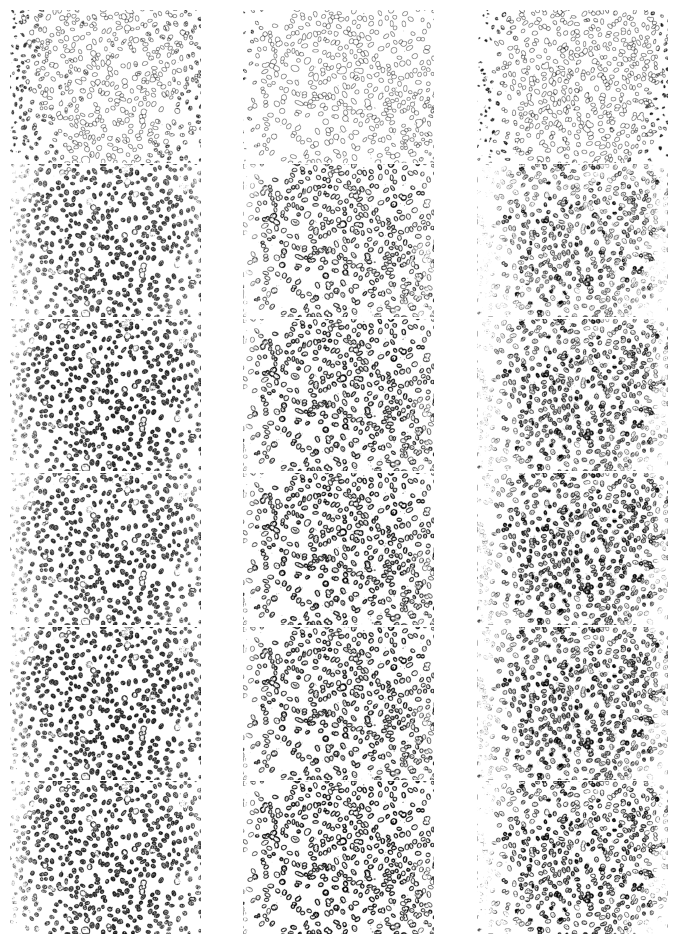

In [ ]:
# make comparison figure for experimenting
figure(lst_task_1, 6, 3)

# Task 2

In [1772]:
# imports and such

from skimage.feature import canny

In [ ]:
# experiment with different sigma, low_threshold, and high_threshold values
# invert the resulting boolean images to compare with ground truth images
img_1_canny = ~canny(img_1, sigma=3, low_threshold=0.04, high_threshold=0.08)
img_2_canny = ~canny(img_2, sigma=2.8, low_threshold=0.06, high_threshold=0.12)
img_3_canny = ~canny(img_3, sigma=3.6, low_threshold=0.01, high_threshold=0.03)

# build list for figure
lst_task_2 = [img_1_normal, img_2_normal, img_3_normal,
              gt_img_1, gt_img_2, gt_img_3,
              img_1_canny, img_2_canny, img_3_canny]

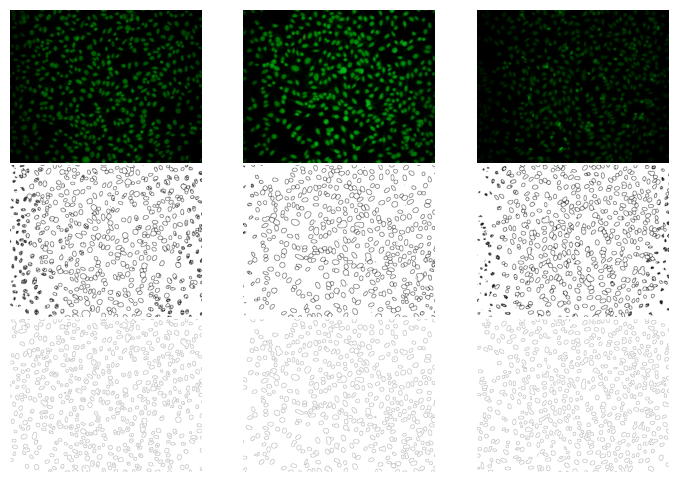

In [ ]:
# make comparison figure
figure(lst_task_2, 3, 3)

# save results to folder
plt.imsave('results/img_1_canny.jpg', img_1_canny, cmap=plt.cm.gray)
plt.imsave('results/img_2_canny.jpg', img_2_canny, cmap=plt.cm.gray)
plt.imsave('results/img_3_canny.jpg', img_3_canny, cmap=plt.cm.gray)

# Task 3

In [1874]:
# imports and such
from skimage.transform import hough_line, hough_line_peaks

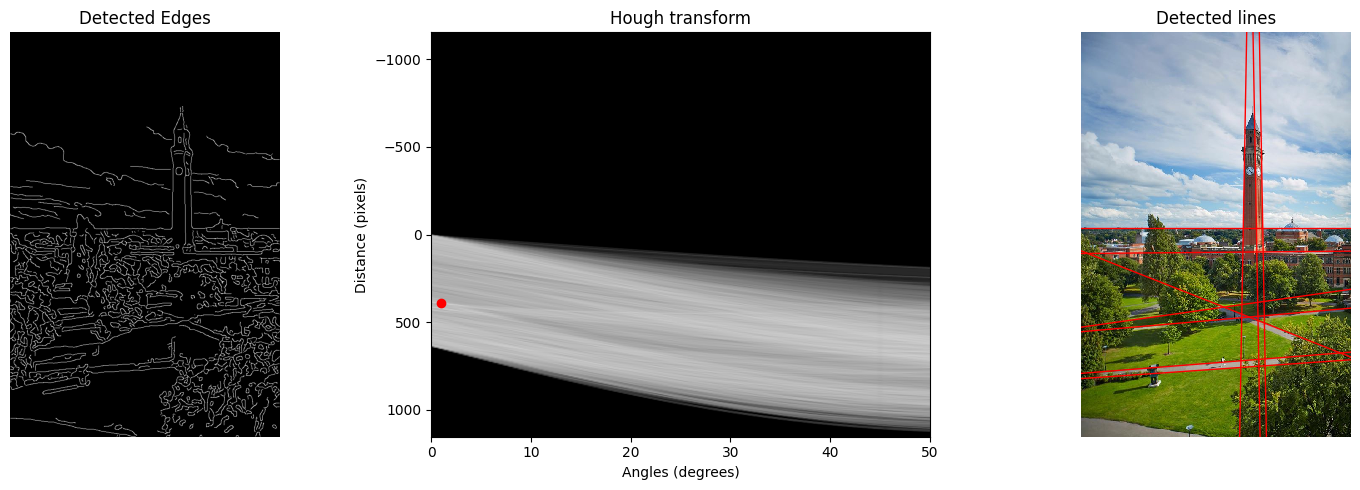

In [1875]:
# read image
img_bham = skimage.io.imread('Bhamimage.jpeg')

# grayscale image
img_bham_gray = rgb2gray(img_bham)

# apply canny edge detection
img_bham_canny = canny(img_bham_gray, sigma=2.8, low_threshold=0.06, high_threshold=0.12)

# Configure the figure
fig, axes = plt.subplots(1, 3,figsize=(16, 5))
ax = axes.ravel()

ax[0].imshow(img_bham_canny, cmap=plt.cm.gray)
ax[0].set_title('Detected Edges')
ax[0].set_axis_off()

# Classic straight-line Hough transform
tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 360, endpoint=False)
h, theta, d = hough_line(img_bham_canny, theta=tested_angles)

accum, angles, dists = hough_line_peaks(h,theta,d,threshold=1,num_peaks=10)

angle_step = 0.5 * np.diff(theta).mean()
d_step = 0.5 * np.diff(d).mean()
bounds = [np.rad2deg(theta[0] - angle_step),
          np.rad2deg(theta[-1] + angle_step),
          d[-1] + d_step, d[0] - d_step]

# Plot each of the lines on the hough transform
for i in range(0,len(angles)):
    ax[1].plot(np.rad2deg(angles[i]),dists[i],'ro')

ax[1].imshow(np.log(1 + h), extent=bounds, cmap=plt.cm.gray,aspect=0.1)

ax[1].set_title('Hough transform')
ax[1].set_xlabel('Angles (degrees)')
ax[1].set_ylabel('Distance (pixels)')

ax[1].axis('auto')
ax[1].set_xlim(0,50)

# Plot Figure 3: Detected Lines
for i in range(0,len(angles)):
    (x0, y0) = dists[i] * np.array([np.cos(angles[i]), np.sin(angles[i])])
    ax[2].axline((x0, y0),slope=np.tan(angles[i] + np.pi/2), color="red", linewidth=1)

ax[2].set_ylim((img_bham.shape[0], 0))
ax[2].set_axis_off()
ax[2].set_title('Detected lines')

skimage.io.imshow(img_bham)
plt.show()
